In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scis
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

/Users/nico/code/pydata-env/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


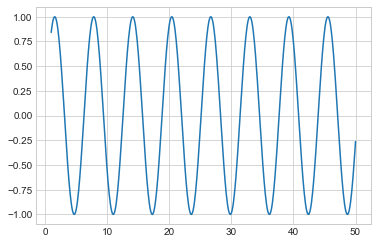

In [2]:
x = np.linspace(1,50,500)
plt.plot(x, np.sin(x))

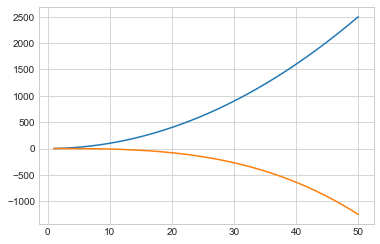

In [3]:
plt.plot(x, (x**2))
plt.plot(x, -(x**3)/100)

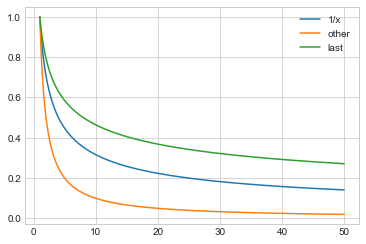

In [4]:
plt.plot(x, np.sqrt(1/x), label='1/x')
plt.plot(x, 1/x, label='other')
plt.plot(x, np.cbrt(1/x), label='last')

plt.legend()

In [5]:
counter = 0

for number in range(10):
    print(counter)
    counter = counter + 1 

0
1
2
3
4
5
6
7
8
9


### kruskal wallis

In [6]:
master = []

for i in range(10):
    # generate new frame
    df = pd.DataFrame({
        'rank': np.linspace(1,50,50),
        'category': np.random.choice([1,2,3],50, p=[.4,.3,.3])
    })

    # calculate sums
    sums = df.groupby('category').sum()
    
    sums = sums **2
    
    sums.columns = [str(i)]

    # calculate stats
    one = df[df.category == 1]['rank'].tolist()
    two = df[df.category == 2]['rank'].tolist()
    three = df[df.category == 3]['rank'].tolist()

    stat, pvalue = scis.kruskal(one,two,three)

    # add stats to the frame
    sums.loc['stat',str(i)] = stat
    sums.loc['pvalue',str(i)] = pvalue

    master.append(sums)

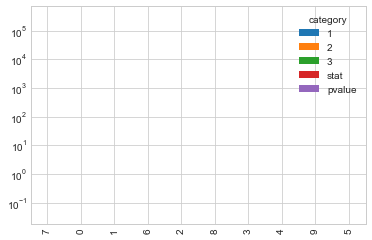

In [7]:
pd.concat(master, axis=1).T.sort_values(by='stat').plot(kind='bar')
plt.yscale('log')

### ttest

In [8]:
# how does one piece of equation work?

store = pd.DataFrame()

for i in range(2,500):
    data = np.random.normal(0,i, i)
    store.loc[i, 'value'] = (round(np.sum(data**2) - np.sum(data)**2/len(data)))**0.5
    store.loc[i,'mean'] = np.mean(data)
    store.loc[i,'std'] = np.std(data)

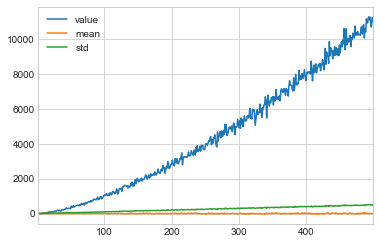

In [9]:
store.plot()

(array([  2.10000000e+01,   9.22000000e+02,   1.55380000e+04,
          1.04288000e+05,   2.95285000e+05,   3.56361000e+05,
          1.83790000e+05,   3.99820000e+04,   3.67800000e+03,
          1.35000000e+02]),
 array([-501.24156147, -405.2541081 , -309.26665473, -213.27920136,
        -117.29174799,  -21.30429462,   74.68315875,  170.67061212,
         266.65806549,  362.64551886,  458.63297223]),
 <a list of 10 Patch objects>)

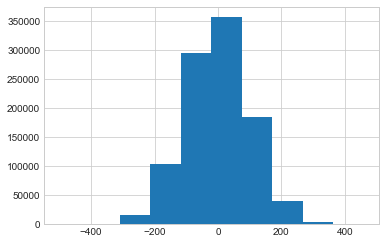

In [10]:
plt.hist(np.random.normal(0,100, 1000000))

## Pearson R

### denominator

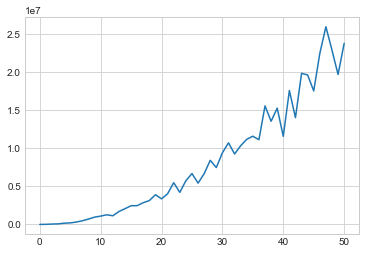

In [28]:
x = np.linspace(0,50,51)
y = []

for i in x:
    a = np.random.normal(10*i,i,100)
    val = len(a)*np.sum(np.square(a)) - np.square(np.sum(a))
    y.append(val)
    
plt.plot(x, y)